In [13]:
from transformers import CLIPProcessor, CLIPModel
from PIL import Image
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")



In [14]:
import matplotlib.pyplot as plt
import os
from google.colab import drive
drive.mount('/gdrive')


%cd /gdrive/MyDrive/CLIP Images

!pip install pillow imageio


Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive/MyDrive/CLIP Images


In [15]:
tiff_files = [f for f in os.listdir() if f.endswith('.tiff') or f.endswith('.tif')]


In [16]:
tiff_images = [Image.open(file_path).convert("RGB") for file_path in tiff_files]


In [17]:
classes = ['CLL', 'MCL', 'FL']
inputs = processor(text=classes, images=tiff_images, return_tensors="pt", padding=True)
outputs = model(**inputs)
logits_per_image = outputs.logits_per_image
probs = logits_per_image.softmax(dim=1)

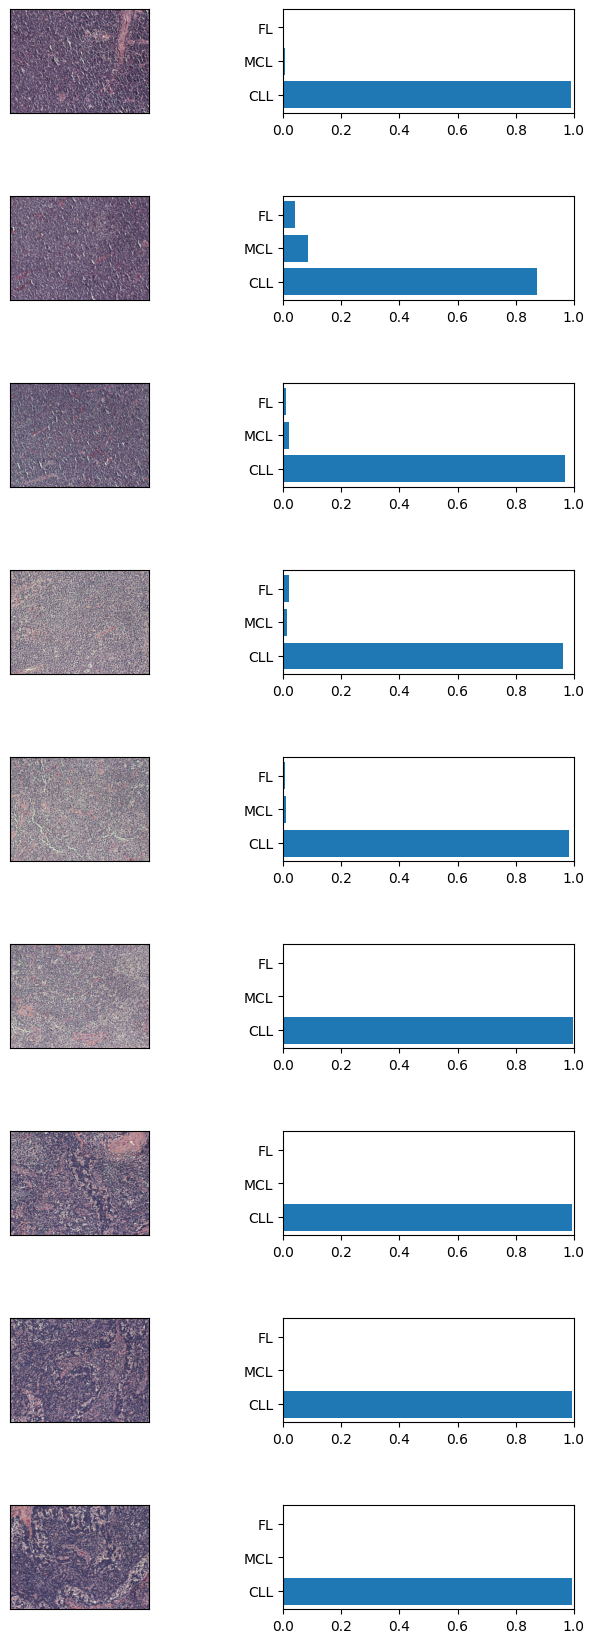

In [21]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, 20))

for idx in range(len(tiff_images)):

    # show original image
    fig.add_subplot(len(tiff_images), 2, 2*(idx+1)-1 )
    plt.imshow(tiff_images[idx])
    plt.xticks([])
    plt.yticks([])

    # show probabilities
    fig.add_subplot(len(tiff_images), 2, 2*(idx+1))
    plt.barh(range(len(probs[0].detach().numpy())),probs[idx].detach().numpy(), tick_label=classes)
    plt.xlim(0,1.0)

    plt.subplots_adjust(left=0.1,
                        bottom=0.1,
                        right=0.9,
                        top=0.9,
                        wspace=0.2,
                        hspace=0.8)

plt.show()